In [ ]:
import pandas as pd

df = pd.read_csv("../data/processed/vineyard_features.csv")
df


In [ ]:
features = [
    "ndvi_mean",
    "ndvi_max",
    "ndvi_std",
    "ndvi_slope",
    "ndvi_drop"
]

X = df[features]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


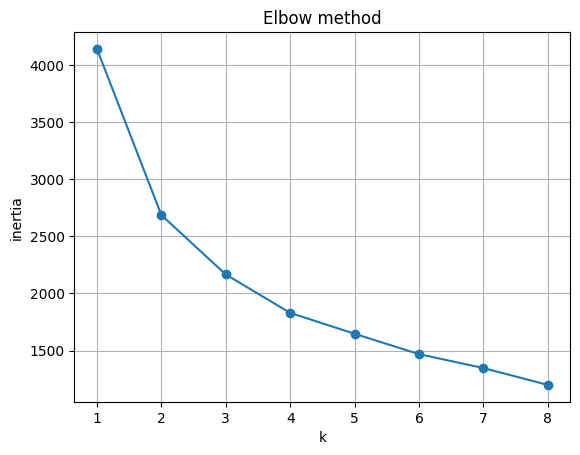

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/vineyard_features_points.csv")

features = ["ndvi_mean","ndvi_max","ndvi_std","ndvi_slope","ndvi_drop"]
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow
inertia = []
K_range = range(1, 9)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(list(K_range), inertia, marker="o")
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Elbow method")
plt.grid(True)
plt.show()


In [2]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df["cluster"] = kmeans.fit_predict(X_scaled)

df.groupby("cluster")[features].mean().round(3)


,ndvi_mean,ndvi_max,ndvi_std,ndvi_slope,ndvi_drop
cluster,,,,,
0,0.258,0.348,0.069,0.001,0.099
1,0.256,0.343,0.044,0.000,0.119
2,0.300,0.425,0.074,0.001,0.169


In [ ]:
df.to_csv("../data/processed/vineyard_clusters.csv", index=False)
